In [1374]:
import pandas as pd

!pip3 install catboost
from IPython.display import clear_output

clear_output()

In [1375]:
# population get

Population_file_path = 'Distance.xlsx'
population = pd.read_excel(Population_file_path, sheet_name='Population_quart')
population = list(population.Population)

number_of_quarts = len(population)

In [1376]:
# distance get

Distance_file_path = 'Distance.xlsx'
distance = pd.read_excel(Distance_file_path, sheet_name='Distance_from_quart', index_col='Id')

distance_from_market = {}
ids = []
for Id in distance.columns:
    distance_from_market[Id] = list(distance[Id])
    ids.append(Id)

In [1377]:
# market data get

Markets_file_path = 'Market_data_changed41.xlsx'
market_data = pd.read_excel(Markets_file_path, index_col='Full_Address')

Coord_file_path = 'Coord.xlsx'
coord = pd.read_excel(Coord_file_path, index_col='Full_Address')

market_data = market_data.join(coord)

market_data = market_data.reset_index()
market_data.head()

,Full_Address,Type,Square,Categorical_Brand,Traffic,Time,Building_Type,Frequency,Id,lat,lon
0,1 Капитанская ул. Санкт-Петербург,супермаркет,628.0,Пятерочка,33652,31,жилой дом,1085.548387,235,30.215445,59.955417
1,1 Новосмоленская набережная Санкт-Петербург,магазин,137.0,Другие,7417,31,жилой дом,239.258065,118,30.230887,59.949145
2,100 Средний проспект В.О. Санкт-Петербург,магазин,131.0,Другие,4339,31,жилой дом,139.967742,152,30.241092,59.931648
3,11 ул. Нахимова Санкт-Петербург,супермаркет,295.0,Пятерочка,26854,39,жилой дом,688.564103,138,30.222111,59.941042
4,12В 17-я линия Васильевского острова Санкт-Пет...,супермаркет,253.7,Пятерочка,22610,31,жилой дом,729.354839,120,30.270979,59.934799


In [1378]:
# square get

square_of_market = []
for row in market_data.iterrows():
    square_of_market.append({'Id': row[1]['Id'], 'Square': row[1]['Square']})

number_of_markets = len(square_of_market)

In [1379]:
# Huff gravity model

# i - number of quart, j- number of market
def huff_probability(i, j, lmbd=0.1):
    Id = square_of_market[j]['Id']
    s_t = square_of_market[j]['Square'] / distance_from_market[Id][i] ** lmbd

    sum_s_t = 0

    for market in square_of_market:
        sum_s_t += market['Square'] / distance_from_market[market['Id']][i] ** lmbd

    return s_t / sum_s_t


huff_pred_by_market = []

for j in range(number_of_markets):
    byuers_count = 0
    for i in range(number_of_quarts):
        prob = huff_probability(i, j)
        byuers_count += prob * population[i]
    huff_pred_by_market.append(byuers_count)

In [1380]:
# Huff insertion in DataFrame

market_data.insert(0, 'Huff', huff_pred_by_market)
market_data.head()

,Huff,Full_Address,Type,Square,Categorical_Brand,Traffic,Time,Building_Type,Frequency,Id,lat,lon
0,4255.486678,1 Капитанская ул. Санкт-Петербург,супермаркет,628.0,Пятерочка,33652,31,жилой дом,1085.548387,235,30.215445,59.955417
1,947.109879,1 Новосмоленская набережная Санкт-Петербург,магазин,137.0,Другие,7417,31,жилой дом,239.258065,118,30.230887,59.949145
2,886.354582,100 Средний проспект В.О. Санкт-Петербург,магазин,131.0,Другие,4339,31,жилой дом,139.967742,152,30.241092,59.931648
3,2024.089775,11 ул. Нахимова Санкт-Петербург,супермаркет,295.0,Пятерочка,26854,39,жилой дом,688.564103,138,30.222111,59.941042
4,1688.208818,12В 17-я линия Васильевского острова Санкт-Пет...,супермаркет,253.7,Пятерочка,22610,31,жилой дом,729.354839,120,30.270979,59.934799


In [1381]:
# Features and Target

X = market_data
y = market_data['Frequency']
X = X.drop(['Frequency'], axis=1)

X = X.drop(['Full_Address'], axis=1)
#X = X.drop(['Square'], axis=1)
#X = X.drop(['Huff'], axis=1)
X = X.drop(['Traffic'], axis=1)
X = X.drop(['Time'], axis=1)
X = X.drop(['Id'], axis=1)
X = X.drop(['lat'], axis=1)
X = X.drop(['lon'], axis=1)
#X = X.drop(['Type'], axis=1)
#X = X.drop(['Categorical_Brand'], axis=1)
#X = X.drop(['Building_Type'], axis=1)


categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

X.head()

,Huff,Type,Square,Categorical_Brand,Building_Type
0,4255.486678,супермаркет,628.0,Пятерочка,жилой дом
1,947.109879,магазин,137.0,Другие,жилой дом
2,886.354582,магазин,131.0,Другие,жилой дом
3,2024.089775,супермаркет,295.0,Пятерочка,жилой дом
4,1688.208818,супермаркет,253.7,Пятерочка,жилой дом


In [1382]:
# One-hot encoding

X = pd.get_dummies(X, columns=categorical_cols)

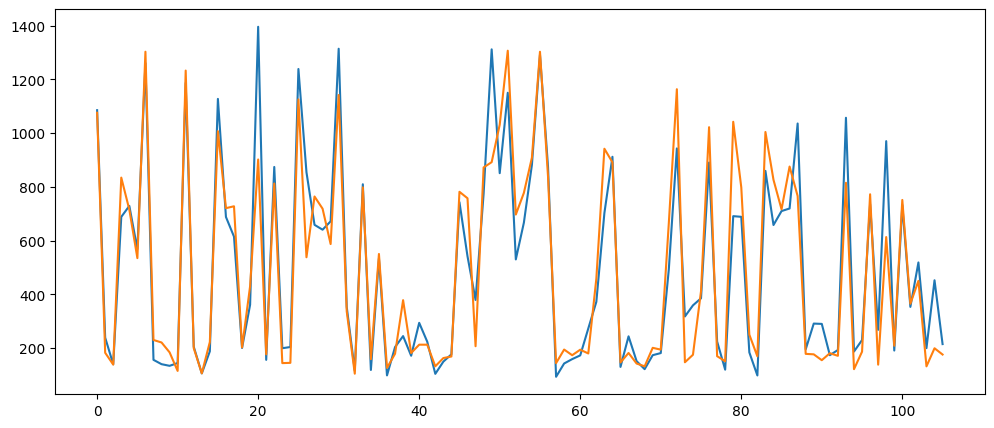

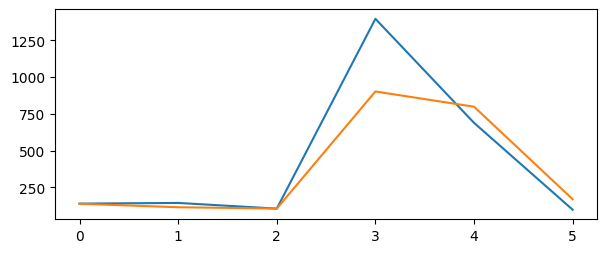

[[139.96774291992188], [144.62069702148438], [106.03448486328125], [1395.933349609375], [688.7999877929688], [98.4000015258789]]
0.24148376286029816
all data: 0.2036050409078598


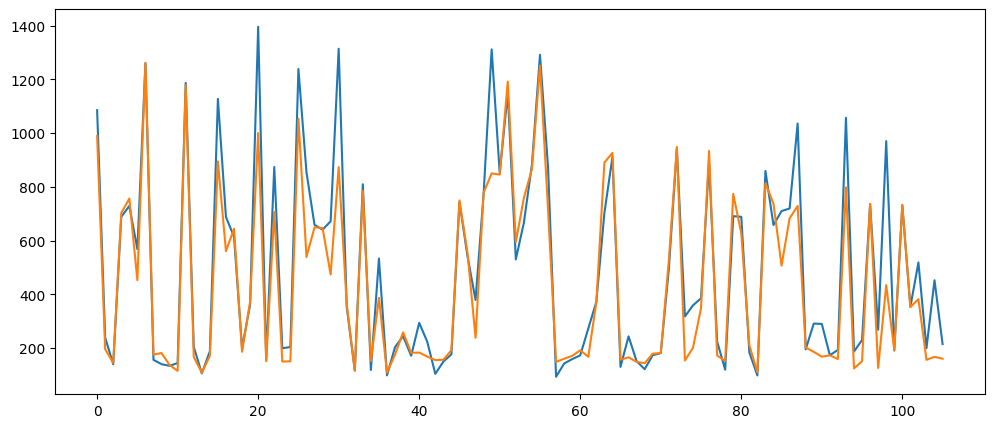

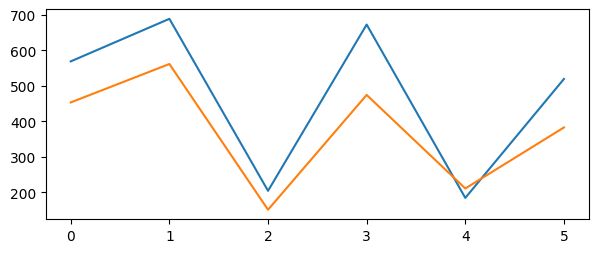

[[568.4375], [688.1613159179688], [204.2244873046875], [672.0322875976562], [184.35484313964844], [518.94287109375]]
0.22489051520824432
all data: 0.16433048248291016


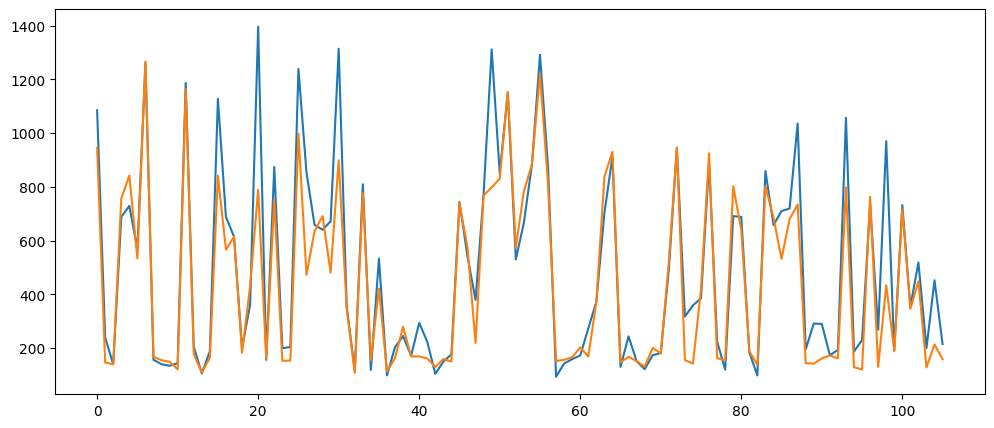

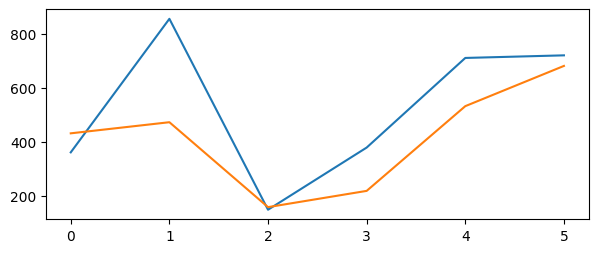

[[361.6388854980469], [854.5555419921875], [149.86666870117188], [379.3548278808594], [710.15625], [719.741943359375]]
0.23854659497737885
all data: 0.176099956035614


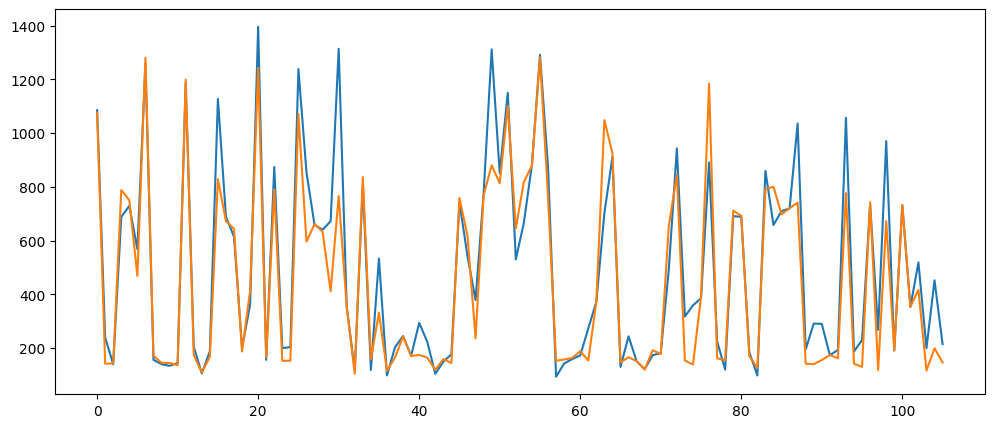

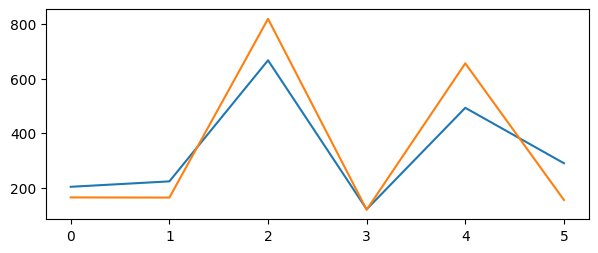

[[204.06666564941406], [223.90908813476562], [666.84375], [121.75862121582031], [493.0625], [290.26666259765625]]
0.24816842377185822
all data: 0.17291317880153656


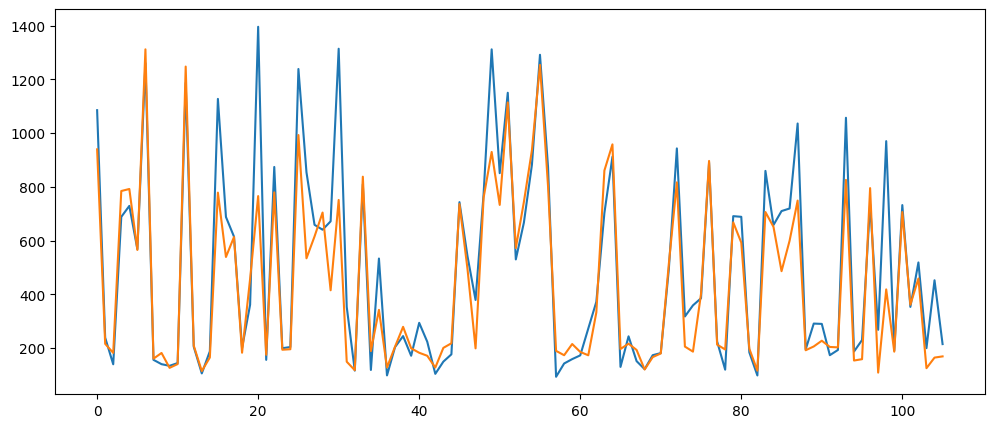

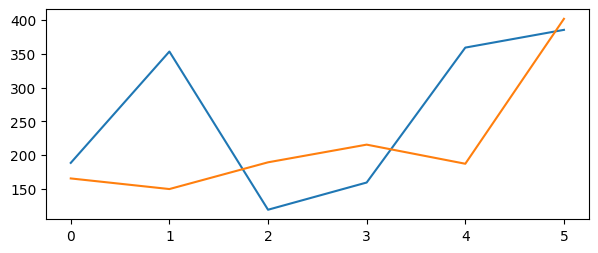

[[188.36363220214844], [353.4571533203125], [118.89655303955078], [159.2413787841797], [359.29412841796875], [385.6071472167969]]
0.3608725070953369
all data: 0.19127467274665833


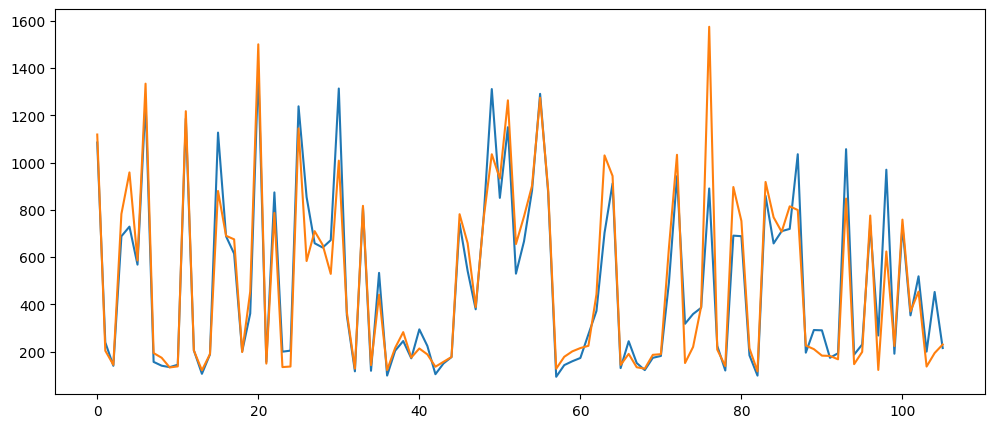

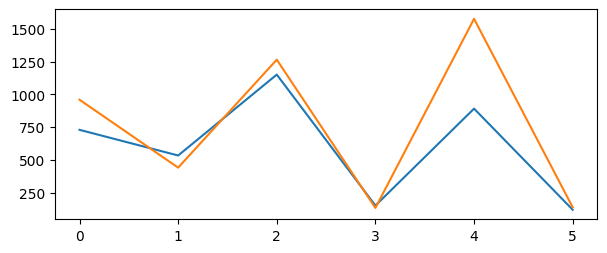

[[729.3548583984375], [533.5428466796875], [1150.4000244140625], [151.6896514892578], [890.8928833007812], [120.06896209716797]]
0.2715805768966675
all data: 0.1588251292705536


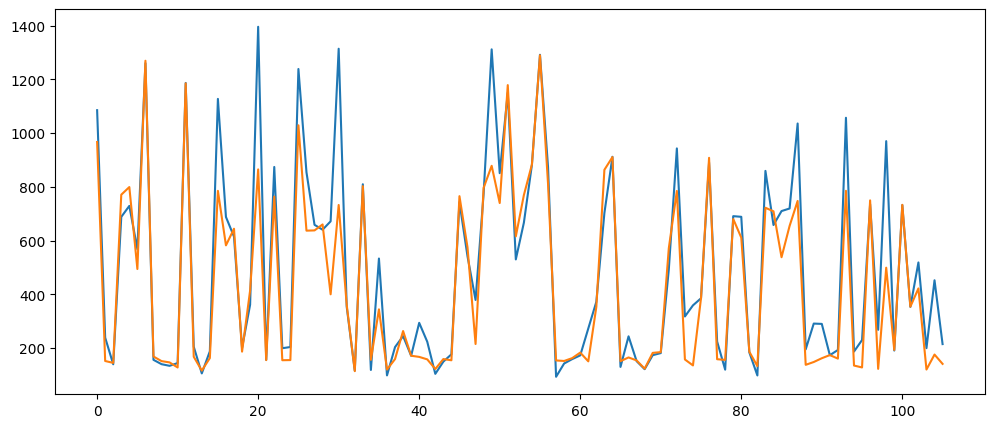

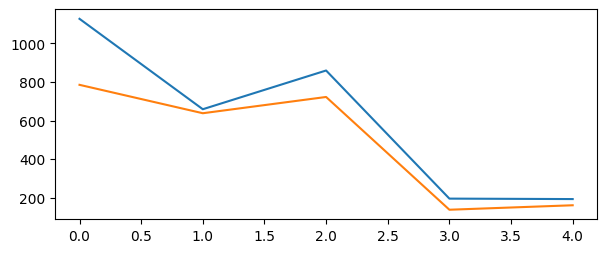

[[1127.5806884765625], [658.933349609375], [859.6666870117188], [195.5806427001953], [193.22579956054688]]
0.19107307493686676
all data: 0.1784166693687439


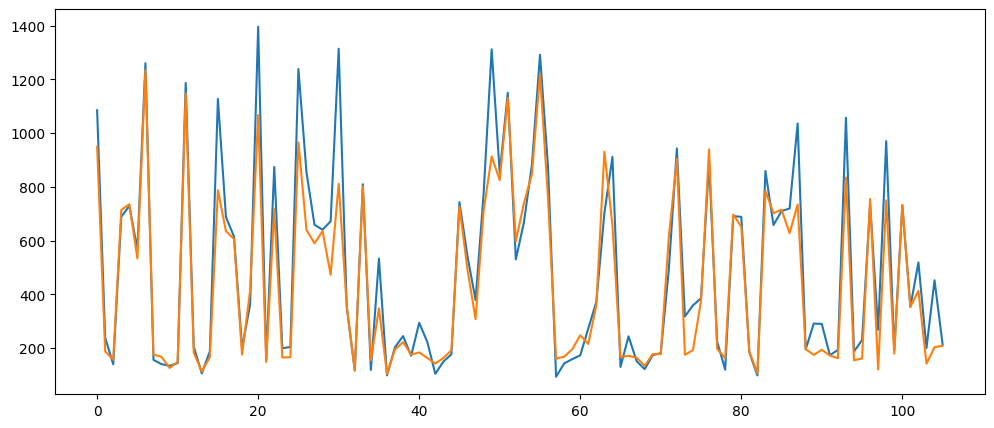

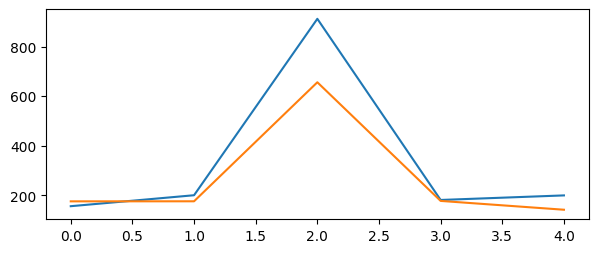

[[156.55555725097656], [200.76666259765625], [912.1666870117188], [181.6857147216797], [200.06666564941406]]
0.16739214956760406
all data: 0.1563718318939209


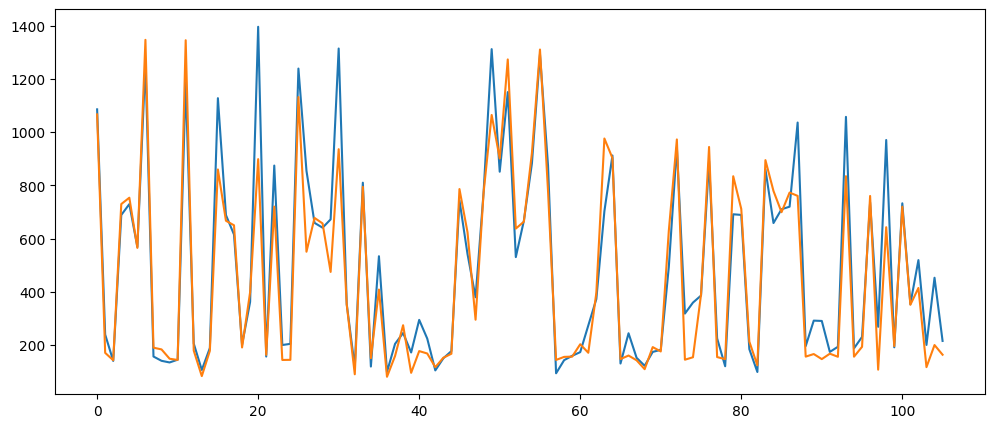

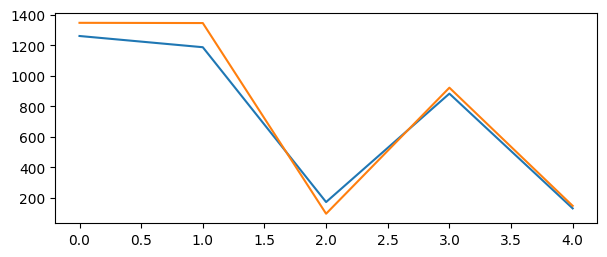

[[1260.4193115234375], [1186.914306640625], [171.76666259765625], [882.7096557617188], [130.3125]]
0.16383473575115204
all data: 0.17073126137256622


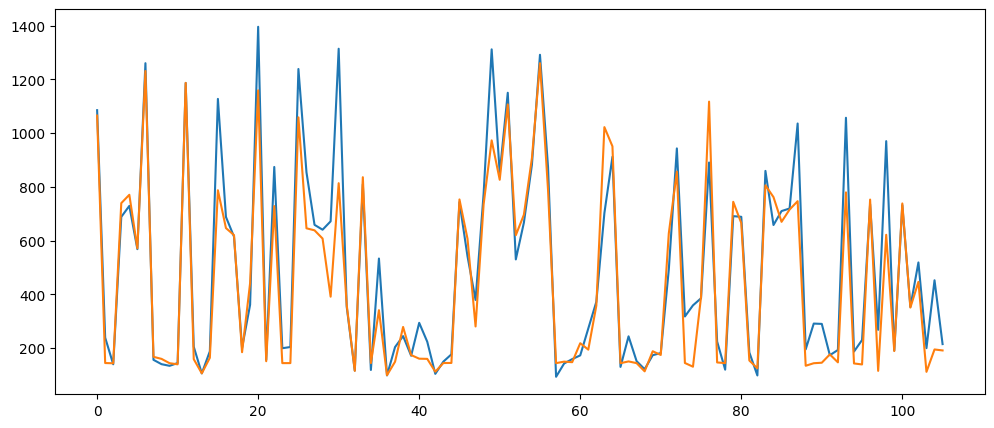

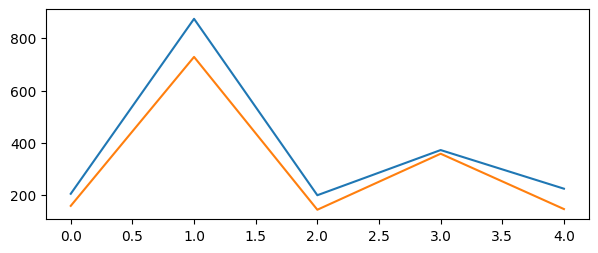

[[205.34483337402344], [874.3103637695312], [199.77142333984375], [372.5], [224.8000030517578]]
0.2106752097606659
all data: 0.1699976772069931


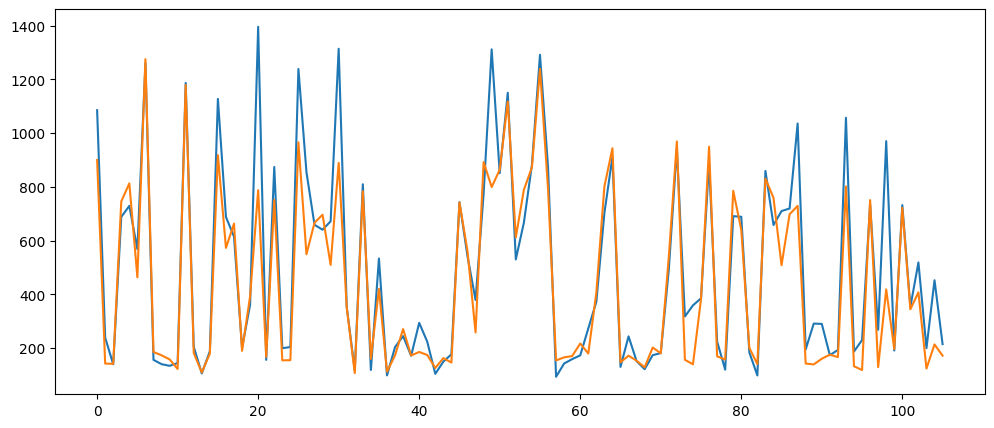

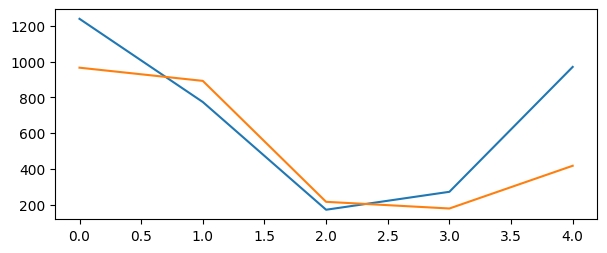

[[1238.857177734375], [774.5], [173.1290283203125], [273.23333740234375], [970.38232421875]]
0.30747324228286743
all data: 0.1804504543542862


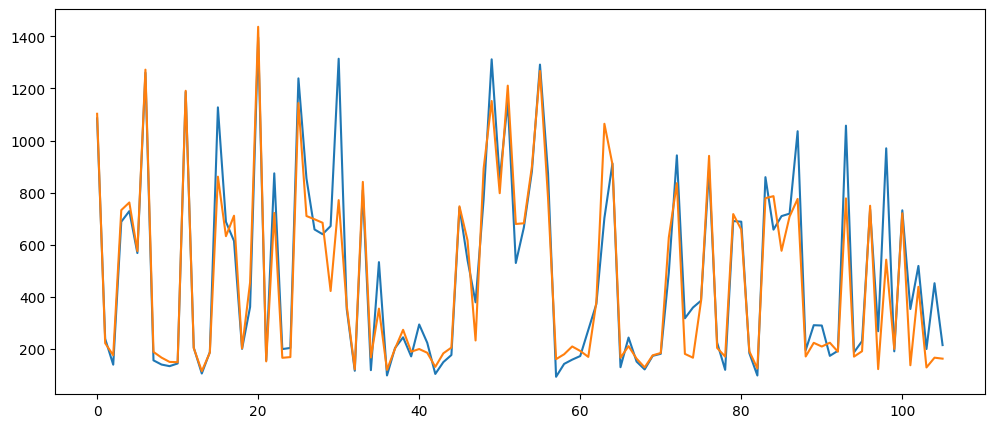

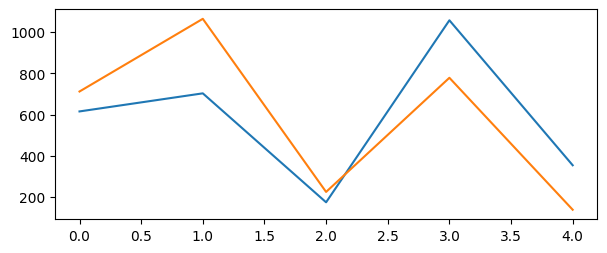

[[614.9629516601562], [702.7647094726562], [173.8709716796875], [1057.3548583984375], [353.6111145019531]]
0.36716777086257935
all data: 0.16908137500286102


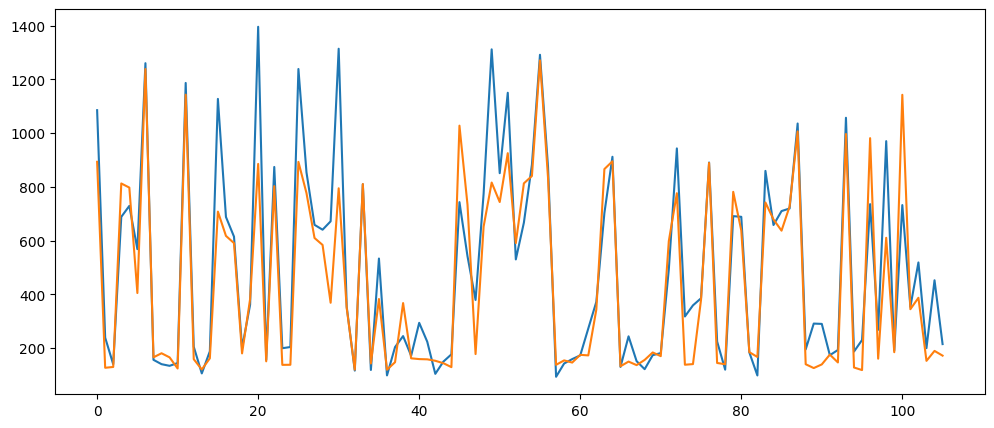

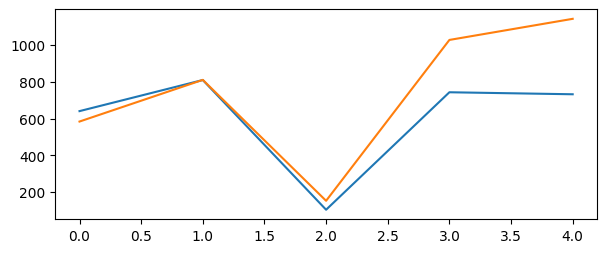

[[640.7930908203125], [809.9354858398438], [104.4000015258789], [743.3793334960938], [732.4483032226562]]
0.2997667193412781
all data: 0.2116769254207611


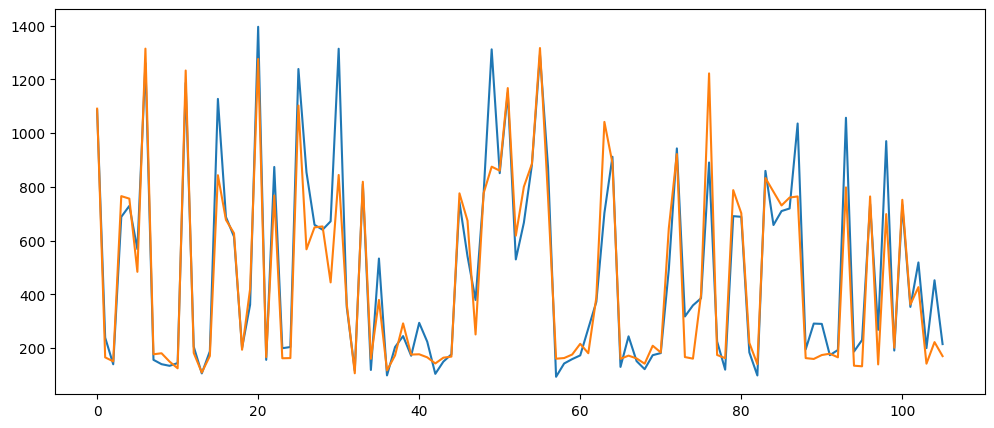

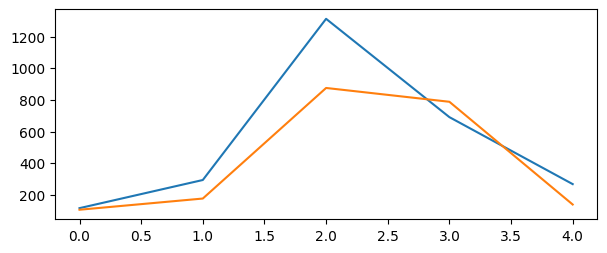

[[116.5686264038086], [294.258056640625], [1311.9375], [691.2069091796875], [268.2903137207031]]
0.2873314321041107
all data: 0.17931154370307922


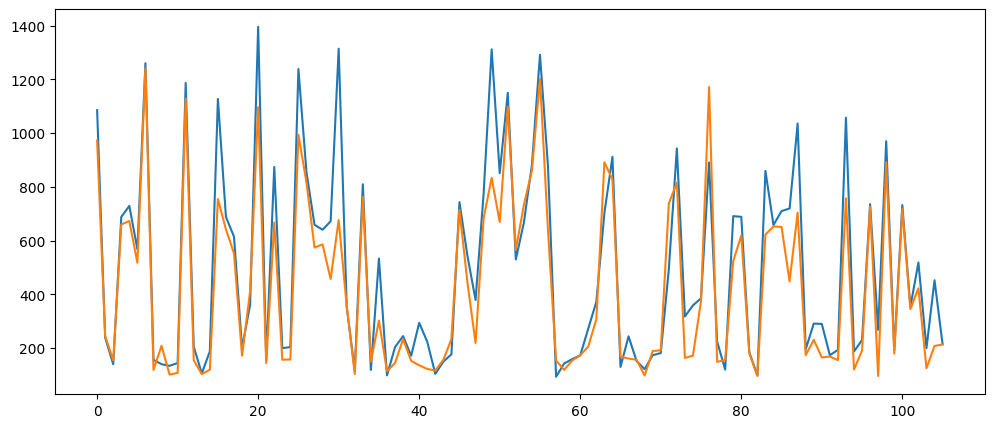

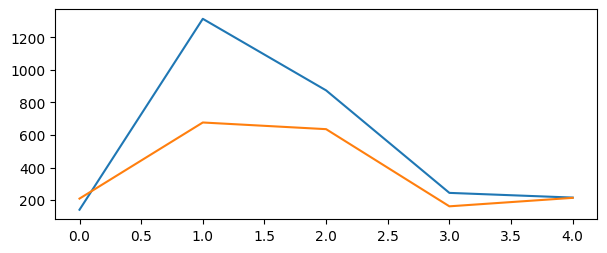

[[140.41378784179688], [1314.225830078125], [874.2413940429688], [244.0], [215.15625]]
0.31830888986587524
all data: 0.19495908915996552


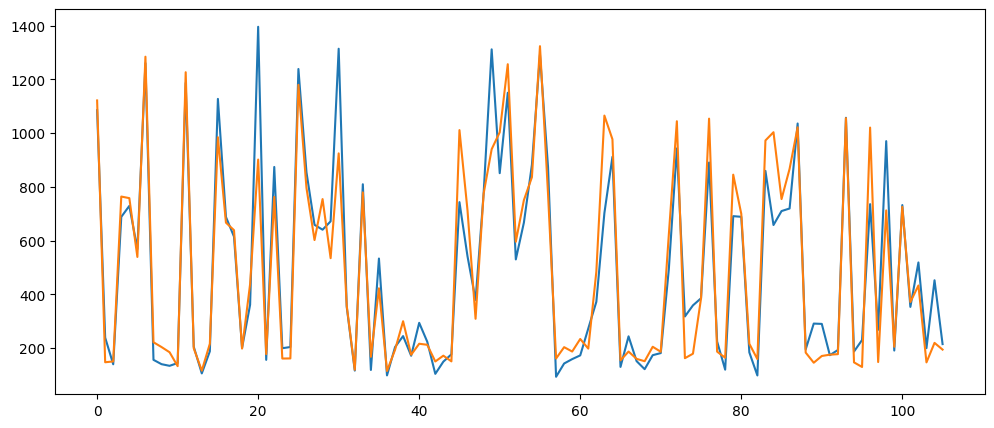

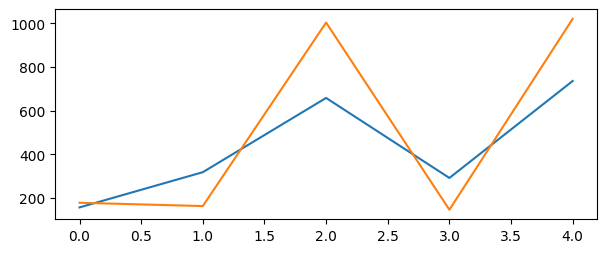

[[156.48484802246094], [317.90625], [658.25927734375], [291.4827575683594], [735.914306640625]]
0.4071866571903229
all data: 0.19376327097415924


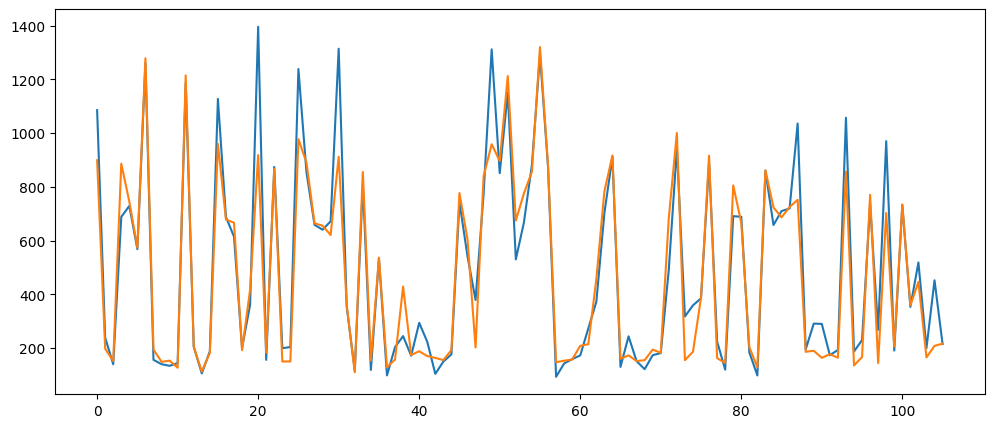

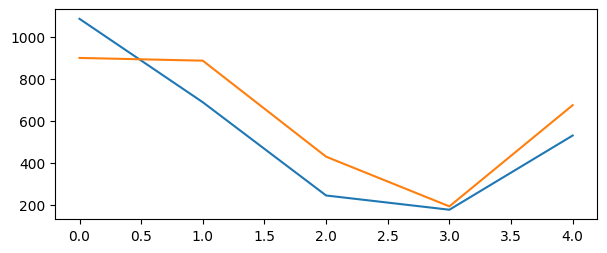

[[1085.54833984375], [688.5640869140625], [244.8709716796875], [177.03225708007812], [530.28125]]
0.3150126338005066
all data: 0.16064608097076416


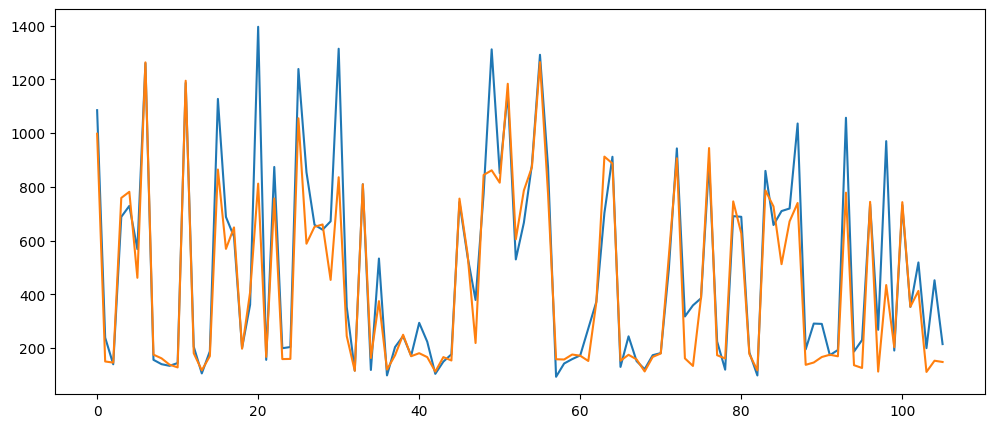

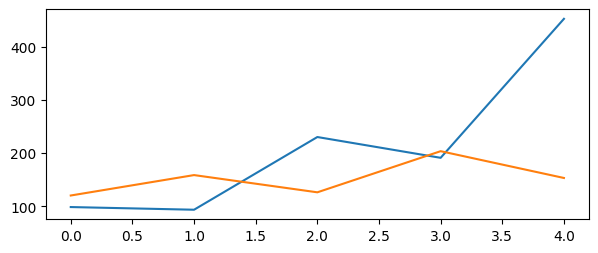

[[98.55172729492188], [93.51724243164062], [230.27777099609375], [191.1666717529297], [452.6285705566406]]
0.41913366317749023
all data: 0.17743100225925446


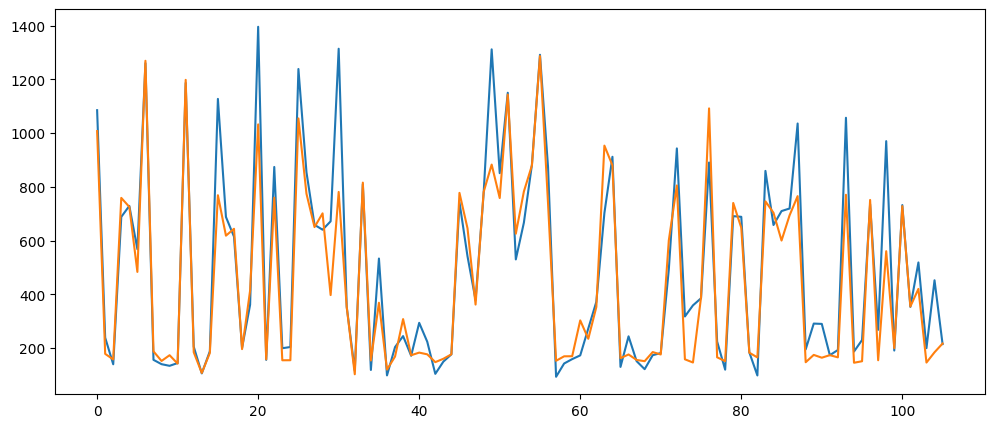

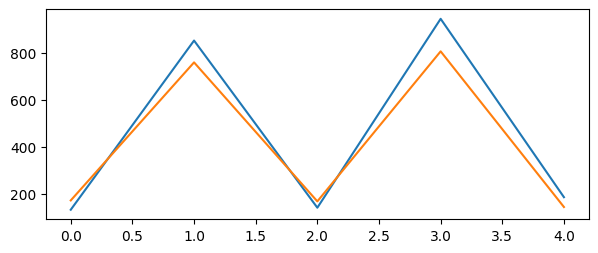

[[134.27586364746094], [851.1666870117188], [142.93548583984375], [943.3103637695312], [187.41378784179688]]
0.19161245226860046
all data: 0.1764484941959381


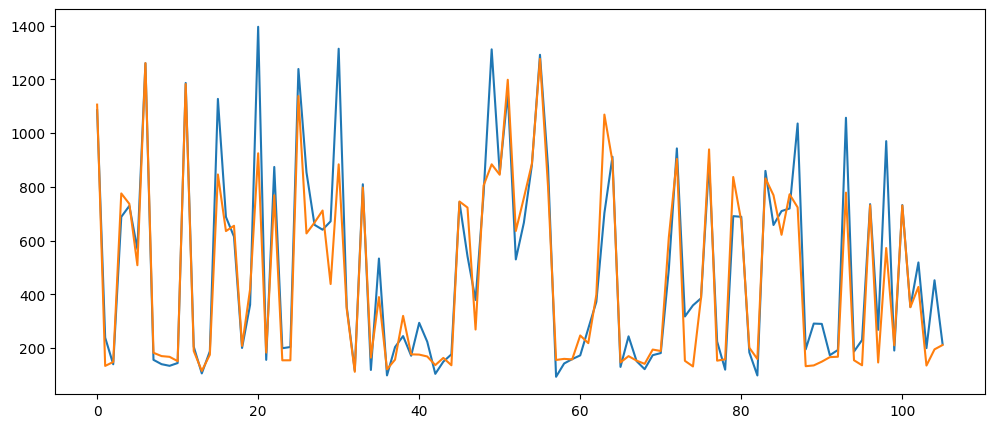

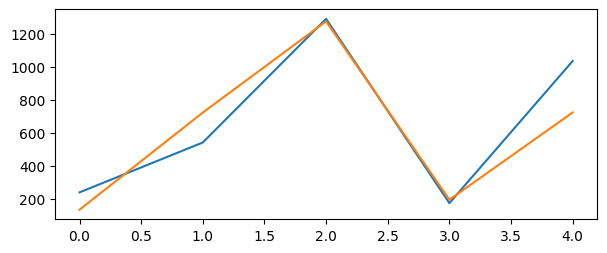

[[239.25807189941406], [541.7586059570312], [1291.72412109375], [173.86666870117188], [1036.0]]
0.24166333675384521
all data: 0.18678055703639984
valid data mean: 0.2736587174236774
all data mean: 0.17865573465824128


In [1383]:
from sklearn.model_selection import KFold
import torch
from torch import nn
from torch.autograd import Variable
from torchmetrics import MeanAbsolutePercentageError

torch.manual_seed(17)


x_data_all = Variable(torch.Tensor(X.values))
y_data_all = Variable(torch.Tensor([[target] for target in y.values]))

class LinearRegressionModel(torch.nn.Module):

    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(len(x_data_all[0]), 64),
            nn.LeakyReLU(0.1),
            nn.Linear(64, 32),
            nn.LeakyReLU(0.1),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        y_pred = self.layers(x)
        return y_pred

# from torch.nn import MSELoss
# loss = MSELoss()
loss = MeanAbsolutePercentageError()



from sklearn.model_selection import KFold

kf = KFold(n_splits=20, random_state=4, shuffle=True)

metrics_valid = []
metrics_all = []

for train_ind, test_ind in kf.split(X):

    x_data_train = Variable(torch.Tensor(X.values[train_ind]))
    y_data_train = Variable(torch.Tensor([[target] for target in y.values[train_ind]]))

    x_data_valid = Variable(torch.Tensor(X.values[test_ind]))
    y_data_valid = Variable(torch.Tensor([[target] for target in y.values[test_ind]]))


    m_model = LinearRegressionModel()

    optimizer_ln = torch.optim.Adam(m_model.parameters(), lr=0.008)

    for epoch in range(20001):

        pred_y = m_model(x_data_train)
        loss_ln = loss(pred_y, y_data_train)

        optimizer_ln.zero_grad()
        loss_ln.backward()
        optimizer_ln.step()


    m_predictions = m_model(x_data_valid)
    m_predictions_all = m_model(x_data_all)

    loss_valid = loss(m_predictions, y_data_valid)
    loss_all = loss(m_predictions_all, y_data_all)

    import matplotlib.pyplot as plt

    fig1 = plt.figure(figsize=(12, 5))
    fig2 = plt.figure(figsize=(7, 6))

    ax2 = fig1.add_subplot(111)
    ax = fig2.add_subplot(211)

    ax.plot(list(i for i in range(len(y_data_valid.tolist()))), list(y_data_valid.tolist()))
    ax.plot(list(i for i in range(len(y_data_valid.tolist()))), m_predictions.tolist())

    ax2.plot(list(i for i in range(len(y))), list(y))
    ax2.plot(list(i for i in range(len(y))), m_predictions_all.tolist())

    plt.show()
    print(list(y_data_valid.tolist()))
    loss_valid = loss(m_predictions, y_data_valid)
    loss_all = loss(m_predictions_all, y_data_all)

    print(loss_valid.item())
    print('all data:', loss_all.item())

    metrics_valid.append(loss_valid.item())
    metrics_all.append(loss_all.item())



from statistics import mean

print('valid data mean:', mean(metrics_valid))
print('all data mean:', mean(metrics_all))

In [1384]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.95, test_size=0.05, random_state=4)


In [1385]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# # MinMaxScaler
#
# pda = MinMaxScaler()
#
# pda.fit(X_train)
#
# X = pda.transform(X)
# X_train = pda.transform(X_train)
# X_valid = pda.transform(X_valid)

In [1386]:
# PyTorch model_ln train

# import torch
# from torch import nn
# from torch.autograd import Variable
# from torchmetrics import MeanAbsolutePercentageError
#
# torch.manual_seed(17)
#
# x_data = Variable(torch.Tensor(X_train.values))
# y_data = Variable(torch.Tensor([[target] for target in y_train.values]))
#
#
# class LinearRegressionModel(torch.nn.Module):
#
#     def __init__(self):
#         super(LinearRegressionModel, self).__init__()
#         self.layers = torch.nn.Sequential(
#             torch.nn.Linear(len(x_data[0]), 64),
#             nn.LeakyReLU(0.1),
#             nn.Linear(64, 32),
#             nn.LeakyReLU(0.1),
#             nn.Linear(32, 1)
#         )
#
#     def forward(self, x):
#         y_pred = self.layers(x)
#         return y_pred
#
#
# torch_model_ln = LinearRegressionModel()
#
# loss_fn_ln = MeanAbsolutePercentageError()
#
# from torch.nn import MSELoss
# loss_fn_ln2 = MSELoss()
#
# optimizer_ln = torch.optim.Adam(torch_model_ln.parameters(), lr=0.008)
#
# for epoch in range(25001):
#
#     pred_y = torch_model_ln(x_data)
#     loss_ln = loss_fn_ln(pred_y, y_data)
#
#     optimizer_ln.zero_grad()
#     loss_ln.backward()
#     optimizer_ln.step()
#
#     if epoch % 5000 == 0:
#         print('epoch {}, loss {}'.format(epoch, loss_ln.item()))

In [1387]:
# #py_torch model validation
#
# x_data_all = Variable(torch.Tensor(X.values))
# y_data_all = Variable(torch.Tensor([[target] for target in y.values]))
#
#
# x_data_valid = Variable(torch.Tensor(X_valid.values))
# y_data_valid = Variable(torch.Tensor([[target] for target in y_valid.values]))

In [1388]:
# import matplotlib.pyplot as plt

In [1389]:
# def compare_valid_torch(m_model, loss):
#     m_predictions = m_model(x_data_valid)
#     m_predictions_all = m_model(x_data_all)
#
#     fig1 = plt.figure(figsize=(12, 5))
#     fig2 = plt.figure(figsize=(7, 6))
#
#     ax2 = fig1.add_subplot(111)
#     ax = fig2.add_subplot(211)
#
#     ax.plot(list(i for i in range(len(y_valid))), list(y_valid))
#     ax.plot(list(i for i in range(len(y_valid))), m_predictions.tolist())
#
#     ax2.plot(list(i for i in range(len(y))), list(y))
#     ax2.plot(list(i for i in range(len(y))), m_predictions_all.tolist())
#
#     plt.show()
#
#     loss_valid = loss(m_predictions, y_data_valid)
#     loss_all = loss(m_predictions_all, y_data_all)
#
#     print(loss_valid.item())
#     print('all data:', loss_all.item())

In [1390]:
# compare_valid_torch(torch_model_ln, loss_fn_ln)